Ejemplo 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto crimenes_locacion.csv')
df.head()

codigo_crimen    latitud   longitud
0              8 -15.068712   0.157991
1              0  -4.065913  12.491768
2              1   3.141179 -12.090601
3              8   8.806998  14.316892
4              3  -5.773641  15.487286

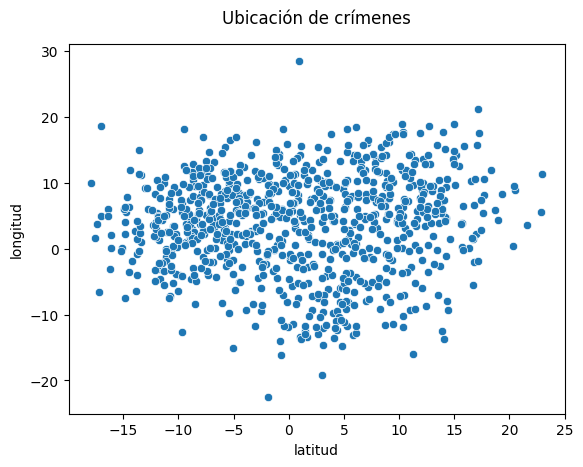

In [3]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax);

In [4]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=6, max_iter=10000)
k_means.fit(df[['latitud', 'longitud']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=6)

In [5]:
centers = k_means.cluster_centers_
centers

array([[ 7.81963057, 12.84674804],
       [ 4.56650842, -8.83674895],
       [ 1.2419058 ,  2.56802966],
       [-9.89560612,  0.53889083],
       [12.76415458,  4.51620396],
       [-5.98272003,  9.50499795]])

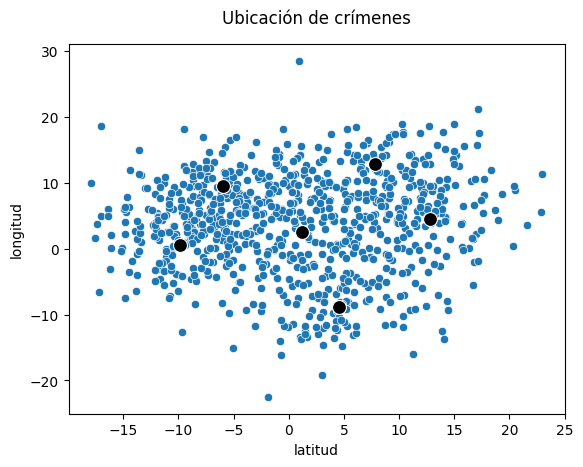

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

In [7]:
clasificaciones = k_means.predict(df[['latitud', 'longitud']])

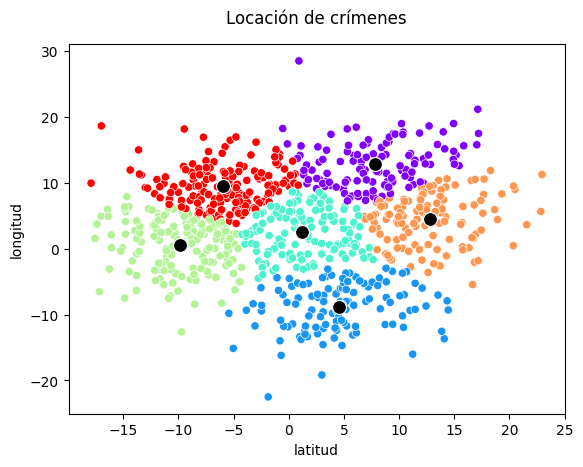

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(x=centers[:,0], y=centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [9]:
#Ahora con 9:
k_means_9 = KMeans(n_clusters=9, max_iter=10000)
k_means_9.fit(df[['latitud', 'longitud']])
centers_9 = k_means_9.cluster_centers_
clasificaciones_9 = k_means_9.predict(df[['latitud', 'longitud']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


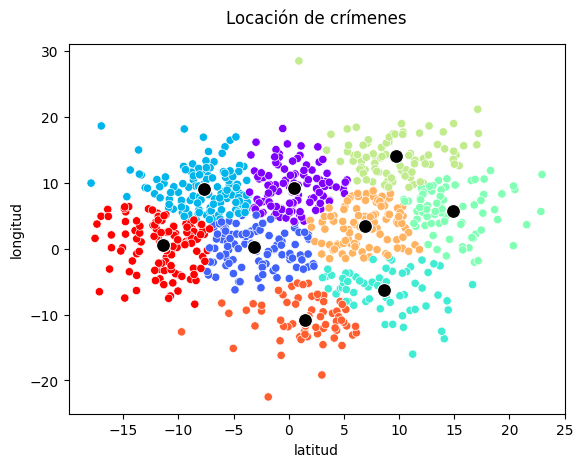

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax, hue=clasificaciones_9, palette='rainbow');
sns.scatterplot(x=centers_9[:,0], y=centers_9[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove() # Con esta línea quitamos la simbología

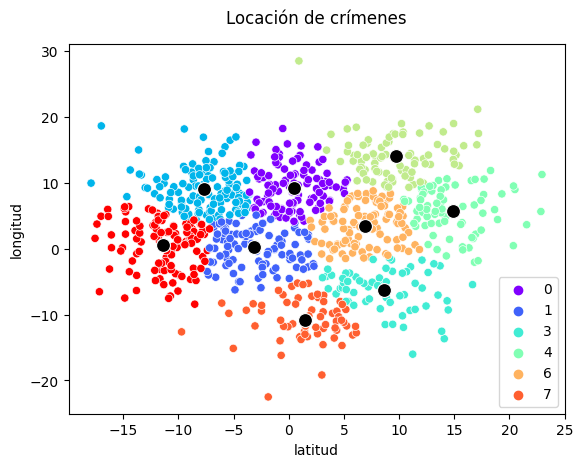

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Locación de crímenes', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(x=df['latitud'], y=df['longitud'], ax=ax, hue=clasificaciones_9, palette='rainbow');
sns.scatterplot(x=centers_9[:,0], y=centers_9[:,1], ax=ax, s=100, color='black');

Reto 1:

https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-2021-MASIVO/blob/main/Sesion-08/Reto-01/k_medias.ipynb

Ejemplo 2: Tumores de mama

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto breast_cancer_wisconsin.csv', index_col=0)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [13]:
df = df.drop(columns=['Unnamed: 32'])

In [14]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [15]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302            1        17.99         10.38          122.80     1001.0   
842517            1        20.57         17.77          132.90     1326.0   
84300903          1        19.69         21.25          130.00     1203.0   
84348301          1        11.42         20.38           77.58      386.1   
84358402          1        20.29         14.34          135.10     1297.0   
...             ...          ...           ...             ...        ...   
926424            1        21.56         22.39          142.00     1479.0   
926682            1        20.13         28.25          131.20     1261.0   
926954            1        16.60         28.08          108.30      858.1   
927241            1        20.60         29.33          140.10     1265.0   
92751             0         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
843

In [16]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
logreg = LogisticRegression(max_iter=100)

In [20]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)
y_pred
# ¿Cómo sabemos si esto es correcto o no? Bueno, LogisticRegression tiene un método score para obtener la exactitud del modelo:

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [22]:
logreg.score(X_test, y_test)

0.935672514619883

Reto 2

In [23]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_absolute_error, r2_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
df = pd.read_csv('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto diabetes-clean.csv')
df.head()

Unnamed: 0  pregnancies  glucose  blood_pressure  skin_thickness  insulin  \
0           0            6      148              72              35        0   
1           1            1       85              66              29        0   
2           2            8      183              64               0        0   
3           3            1       89              66              23       94   
4           4            0      137              40              35      168   

    bmi  diabetes_pedigree_function  age  outcome  
0  33.6                       0.627   50        1  
1  26.6                       0.351   31        0  
2  23.3                       0.672   32        1  
3  28.1                       0.167   21        0  
4  43.1                       2.288   33        1

In [24]:
df.shape

(768, 10)

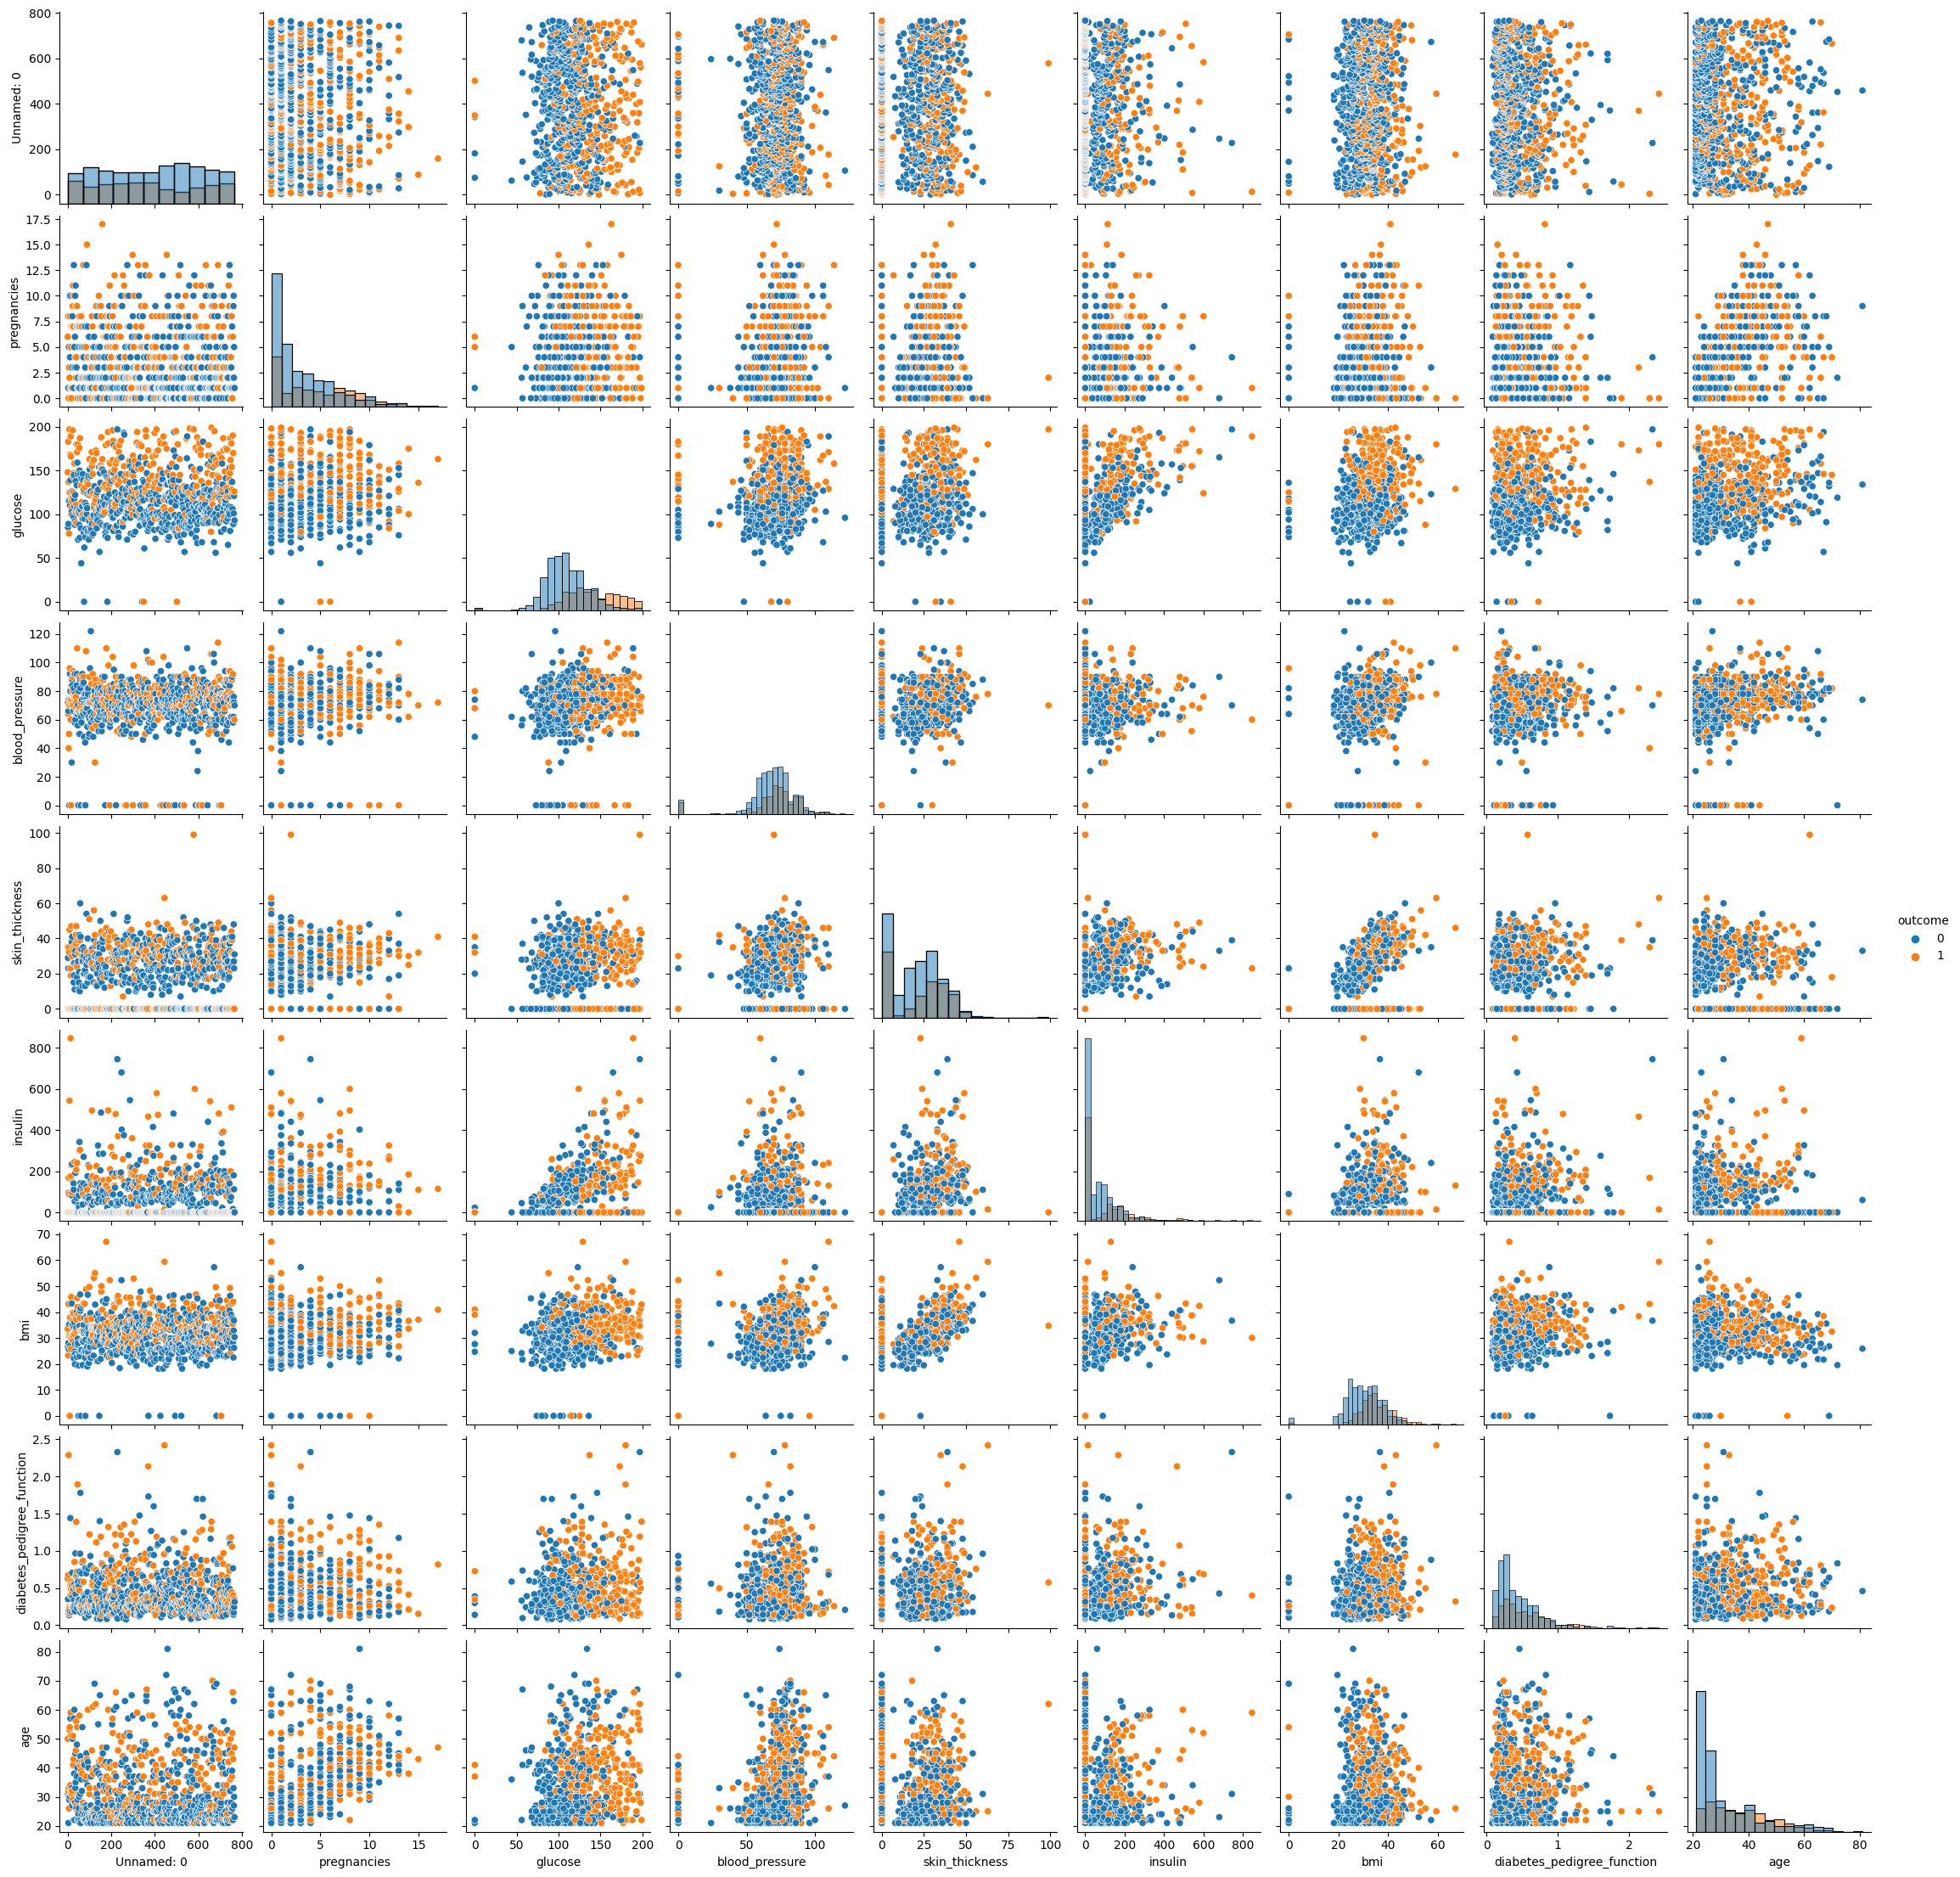

In [25]:
sns.pairplot(df, hue = "outcome", diag_kind = "hist")

In [26]:
df.describe()

Unnamed: 0  pregnancies     glucose  blood_pressure  skin_thickness  \
count  768.000000   768.000000  768.000000      768.000000      768.000000   
mean   383.500000     3.845052  120.894531       69.105469       20.536458   
std    221.846794     3.369578   31.972618       19.355807       15.952218   
min      0.000000     0.000000    0.000000        0.000000        0.000000   
25%    191.750000     1.000000   99.000000       62.000000        0.000000   
50%    383.500000     3.000000  117.000000       72.000000       23.000000   
75%    575.250000     6.000000  140.250000       80.000000       32.000000   
max    767.000000    17.000000  199.000000      122.000000       99.000000   

          insulin         bmi  diabetes_pedigree_function         age  \
count  768.000000  768.000000                  768.000000  768.000000   
mean    79.799479   31.992578                    0.471876   33.240885   
std    115.244002    7.884160                    0.331329   11.760232   
min      0.000000    0.000000                    0.078000   21.000000   
25%      0.000000   27.300000                    0.243750   24.000000   
50%     30.500000   32.000000                    0.372500   29.000000   
75%    127.250000   36.600000                    0.626250   41.000000   
max    846.000000   67.100000                    2.420000   81.000000   

          outcome  
count  768.000000  
mean     0.348958  
std      0.476951  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [27]:
# No Nulls
df.isna().sum().sort_values(ascending = False)

Unnamed: 0                    0
pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

In [28]:
# Var Corr
df_corr = df.corr()

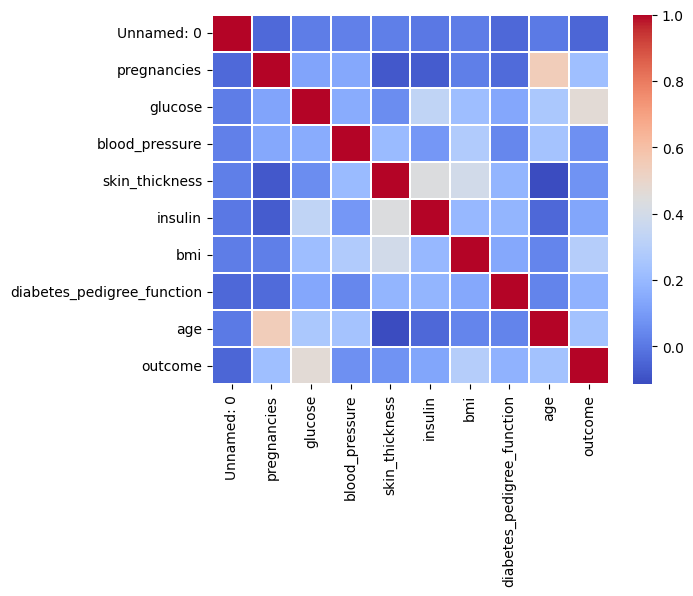

In [29]:
# f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, cmap = "coolwarm", linewidth = 0.1);
plt.show();

In [30]:
def correlation(df, threshold):
  col_corr = set()
  corr_matrix = df.corr()

  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
    return col_corr

In [31]:
cols_corr = correlation(df, 0.85)
cols_corr

set()

In [32]:
x = df.drop(columns = ["outcome"])
y = df["outcome"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", x_train.shape)
print("y_test:", x_test.shape)

x_train: (614, 9)
x_test: (154, 9)
y_train: (614, 9)
y_test: (154, 9)


In [37]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [38]:
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [39]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
cm

array([[76, 14],
       [25, 39]])

In [40]:
# Distribución de clases
df.outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: outcome, dtype: float64

In [41]:
# Accuracy
(90+29) / (90+12+23+29)

0.7727272727272727

In [42]:
# Score
logreg.score(x_test, y_test)

0.7467532467532467

In [43]:
from sklearn.metrics import classification_report

In [44]:
# Resumen de Metricas para test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80        90
           1       0.74      0.61      0.67        64

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.74       154



In [46]:
# Resumen de Metricas para train
print(classification_report(y_train, logreg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       410
           1       0.74      0.55      0.63       204

    accuracy                           0.79       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.78      0.79      0.78       614



In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.7269097222222222

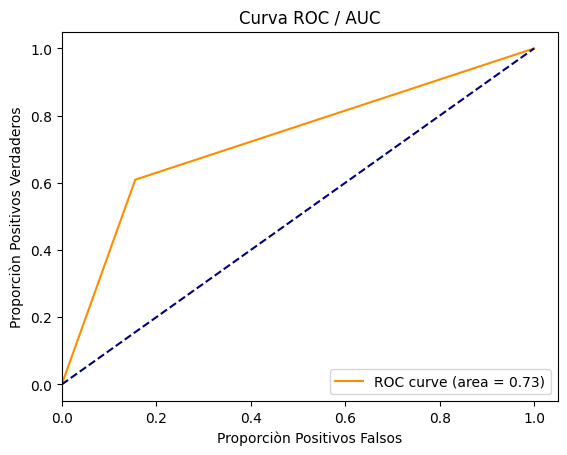

In [55]:
plt.figure()
plt.plot(fpr, tpr, color = "darkorange",
         label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel("Proporciòn Positivos Falsos")
plt.ylabel("Proporciòn Positivos Verdaderos")
plt.title("Curva ROC / AUC")
plt.legend(loc = "lower right")
plt.show()





Ejemplo 3

In [45]:
from IPython.display import Image
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

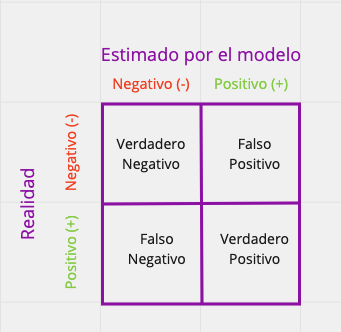

Verdadero Positivo (VP): Cuando la etiqueta real era positiva y nuestro modelo regresó un resultado positivo.

Falso Negativo (FN): Cuando la etiqueta real era positiva pero nuestro modelo regresó un resultado negativo.

Falso Positivo (FP): Cuando la etiqueta real era negativa pero nuestro modelo regresó un resultado positivo.

Verdadero Negativo (VN): Cuando la etiqueta real era negativa y nuestro modelo regresó un resultado negativo.

In [56]:
df = pd.read_csv('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [57]:
y_pred = logreg.predict(X_test)

In [58]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[109,   5],
       [  3,  54]])

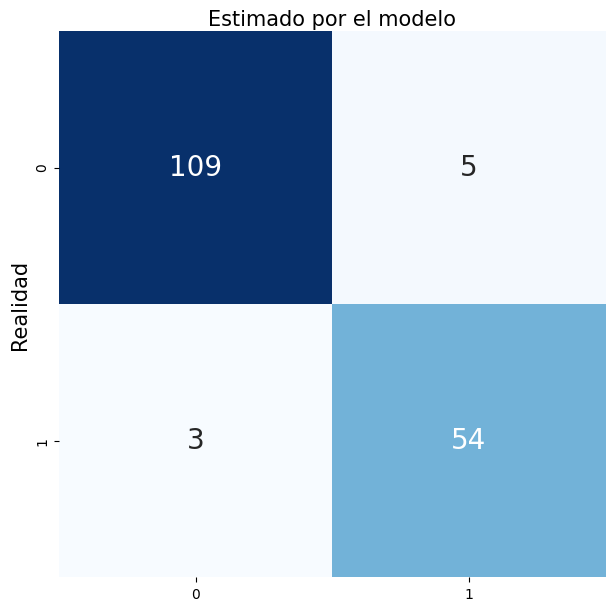

In [59]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Precision = VP / (VP + FP)

Exactitud = (VP + VN) / (VP + FN + FP + VN)

Sensibilidad = VP / (VP + FN)

Especificidad = VN / (VN + FP)

In [60]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.9152542372881356
Exactitud: 0.9532163742690059
Sensibilidad: 0.9473684210526315
Especificidad: 0.956140350877193


Ejemplo 4

In [61]:
from IPython.display import Image

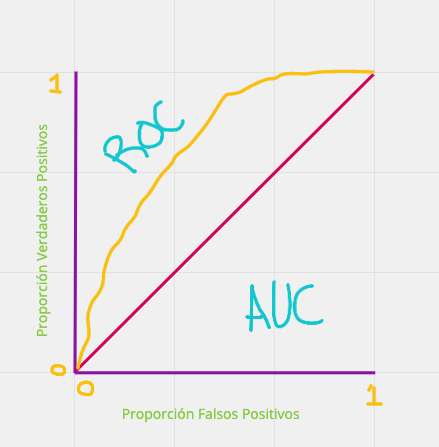

El eje y representa la proporción de Verdaderos Positivos, que es lo mismo que la Sensibilidad.

El eje x representa la proporción de Falsos Positivos. Esto quiere decir: de todas las clasificaciones negativas que había en realidad, cuántas fueron clasificadas como positivas por nuestro modelo. Para obtener este valor, restamos el valor de Especificidad a 1 (1 - especificidad).

La curva ROC grafica el cambio en la proporción de Verdaderos Positivos contra la proporción de Falsos Positivos a través de diferentes umbrales.

La AUC (Area Under The Curve), o área debajo de la curva, es toda el área que se encuentra por debajo de la curva ROC. Podemos tener un valor entre 0 y 1.

Un valor de AUC cercano a 1, como el que podemos ver en el dibujo anterior, significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos. Además, es muy probable que elija el valor correcto.

Un valor de AUC cercano al 0.5 significa que nuestro modelo no puede diferenciar entre positivos y negativos.

Un valor cercano a 0 significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos pero elige casi siempre el valor contrario al real. O sea, elige positivos cuando debería de elegir negativos, y viceversa.

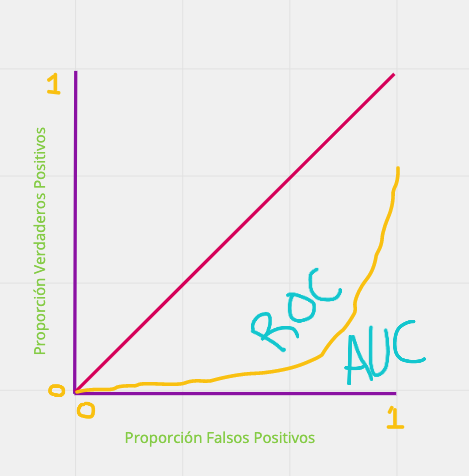

In [62]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [63]:
df = pd.read_csv('../../content/drive/MyDrive/Code/BEDU/All_Datasets/Remoto_Datasets/Remoto breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [64]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [68]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [66]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba[:10,:]

array([[8.40323289e-08, 9.99999916e-01],
       [1.83015716e-01, 8.16984284e-01],
       [9.84866769e-01, 1.51332312e-02],
       [9.87585760e-01, 1.24142403e-02],
       [1.27257175e-01, 8.72742825e-01],
       [9.99300936e-01, 6.99063840e-04],
       [9.99813150e-01, 1.86850143e-04],
       [9.99910229e-01, 8.97714980e-05],
       [9.99949342e-01, 5.06581210e-05],
       [9.99800979e-01, 1.99020774e-04]])

In [67]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

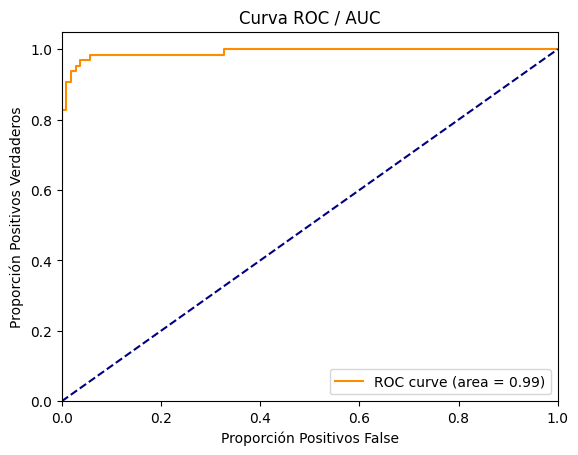

In [69]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()
# Nuestro valor AUC es muy cercano al 1 (0.99). Esto significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos,
# y que además es muy probable que elija la clasificación correcta.